<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/course_project_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-

ERROR: Invalid requirement: 'scikit-'


In [2]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from keras_preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import drive

from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout, Activation
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.9.2


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#!unzip gdrive/MyDrive/'Urban 100 X2'/'HIGH X2 Urban 100.zip'
#!unzip gdrive/MyDrive/'Raw Data 855'/'low_res.zip'
!unzip gdrive/MyDrive/'Raw Data 855'/'low_res.zip'

Archive:  gdrive/MyDrive/Raw Data 855/low_res.zip
   creating: low_res/
  inflating: low_res/0.png           
  inflating: low_res/1.png           
  inflating: low_res/10.png          
  inflating: low_res/100.png         
  inflating: low_res/101.png         
  inflating: low_res/102.png         
  inflating: low_res/103.png         
  inflating: low_res/104.png         
  inflating: low_res/105.png         
  inflating: low_res/106.png         
  inflating: low_res/107.png         
  inflating: low_res/108.png         
  inflating: low_res/109.png         
  inflating: low_res/11.png          
  inflating: low_res/110.png         
  inflating: low_res/111.png         
  inflating: low_res/112.png         
  inflating: low_res/113.png         
  inflating: low_res/114.png         
  inflating: low_res/115.png         
  inflating: low_res/116.png         
  inflating: low_res/117.png         
  inflating: low_res/118.png         
  inflating: low_res/119.png         
  inflating: low

In [8]:
#!unzip gdrive/MyDrive/'Urban 100 X2'/'LOW X2 Urban 100.zip'
!unzip gdrive/MyDrive/'Raw Data 855'/'high_res.zip'
#!unzip /'Raw Data 855'/'high_res.zip'

Archive:  gdrive/MyDrive/Raw Data 855/high_res.zip
   creating: high_res/
  inflating: high_res/0.png          
  inflating: high_res/1.png          
  inflating: high_res/10.png         
  inflating: high_res/100.png        
  inflating: high_res/101.png        
  inflating: high_res/102.png        
  inflating: high_res/103.png        
  inflating: high_res/104.png        
  inflating: high_res/105.png        
  inflating: high_res/106.png        
  inflating: high_res/107.png        
  inflating: high_res/108.png        
  inflating: high_res/109.png        
  inflating: high_res/11.png         
  inflating: high_res/110.png        
  inflating: high_res/111.png        
  inflating: high_res/112.png        
  inflating: high_res/113.png        
  inflating: high_res/114.png        
  inflating: high_res/115.png        
  inflating: high_res/116.png        
  inflating: high_res/117.png        
  inflating: high_res/118.png        
  inflating: high_res/119.png        
  inflating: h

In [9]:
# to get the files in proper order
def sorted_alphanumeric(data): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/high_res'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '855.png':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))


low_img = []
path = '/content/low_res'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.png':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 855/855 [00:03<00:00, 233.25it/s]


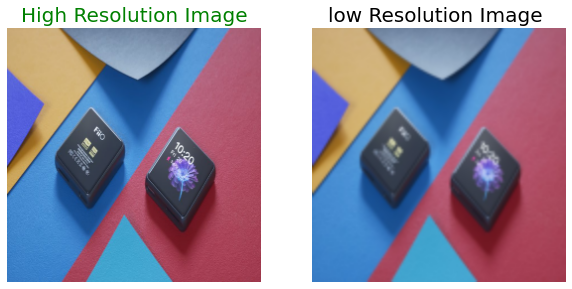

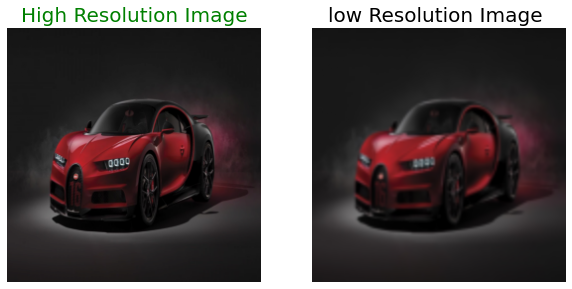

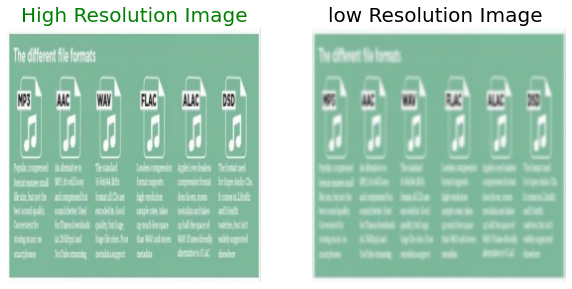

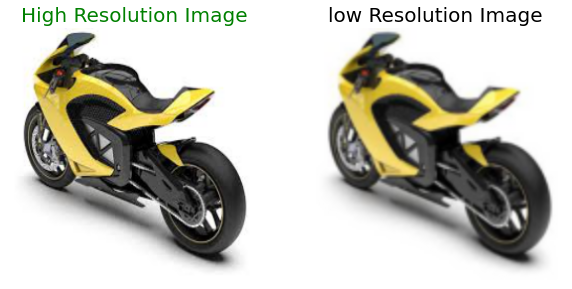

In [10]:
for i in range(4):
    a = np.random.randint(0,100)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Image', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [11]:
train_high_image = high_img[:700]
train_low_image = low_img[:700]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[700:810]
validation_low_image = low_img[700:810]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[810:]
test_low_image = low_img[810:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (700, 256, 256, 3)
Shape of test images: (45, 256, 256, 3)
Shape of validation images: (110, 256, 256, 3)


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)    
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape):
    inputs = Input(shape=(256,256,3))
    
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)             #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(3, 1, padding="same", activation="LeakyReLU")(d4)  #Binary (can be multiclass)

    model = Model(inputs, outputs, name="U-Net")
    
    #cmmodel.summary()
    return model
inputs = Input(shape=(256,256,3))
model = build_unet(inputs) 
#plot_model(model, to_file ='super_res(U-NET).png',show_shapes=True)

In [13]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = pixel_mse_loss,
              metrics = ['acc'])
#model.summary()
#plot_model(model, to_file ='super_res(U-NET).png',show_shapes=True)

In [15]:
model.fit(train_low_image, train_high_image, epochs = 10, batch_size = 1, validation_data = (validation_low_image,validation_high_image))

Epoch 1/10
  2/700 [..............................] - ETA: 1:20:11 - loss: 1.7994 - acc: 0.1974

KeyboardInterrupt: ignored

In [ ]:
model.save('superresolution_unet.h5')

In [ ]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [ ]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(1,15):
    
    predicted = np.clip(model.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR',PSNR(test_high_image[i],predicted),'dB')

In [ ]:
def downsample_image(image,scale):
    x=tf.image.resize(image / 255,(image.shape[0]//scale, image.shape[1]//scale))
    x=tf.image.resize(x,(image.shape[0], image.shape[1]), method = tf.image.ResizeMethod.BICUBIC)
    return x

In [ ]:
#!unzip gdrive/MyDrive/'Urban 100 X4.zip'

In [ ]:
#!unzip /content/'Urban 100 X4'/'HIGH X4 Urban 100.zip'

In [ ]:
#!unzip /content/'Urban 100 X4'/'LOW X4 Urban 100.zip'

In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
#SIZE = 512
high_img = []
path = '/content/HIGH X2 Urban'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == 'img_101_SRF_2_HR':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))


low_img = []
path = '/content/LOW X2 Urban'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == 'img_101_SRF_2_LR.png.png':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = downsample_image(img,4)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        #img = img.astype('float32') / 255.0
        img = downsample_image(img,2)
        low_img.append(img_to_array(img))
        
high_image = high_img[:50]
low_image = low_img[:50]
high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

#validation_high_image = high_img[650:750]
#validation_low_image = low_img[650:750]
#validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE*2,SIZE*2,3))
#validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


t_high_image = high_img[50:]
t_low_image = low_img[50:]
t_high_image= np.reshape(t_high_image,(len(t_high_image),SIZE,SIZE,3))
t_low_image = np.reshape(t_low_image,(len(t_low_image),SIZE,SIZE,3))


def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(1,10):
    
    predicted = np.clip(model.predict(t_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(t_high_image[i],t_low_image[i],predicted)
    print('PSNR',PSNR(t_high_image[i],predicted),'dB',"SSIM",tf.image.ssim(t_high_image[i],predicted,max_val=1))